# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgoc_fanin_2000.csv'
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
selected_individuals = 10
min_parameter_values = numpy.array([6.0e-12,1.0])
max_parameter_values = numpy.array([7.0e-11,2.0])
labels = ['MF-GoC Max Weight (nS)', 'MF-GoC LTD/LTP ratio']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 4 columns and 173 rows
Hall of fame:
1 . Parameters: [4.23967085e-11 1.39442686e+00] Features: [0.6671996  0.02353418]
2 . Parameters: [4.15406144e-11 1.31914825e+00] Features: [0.66539708 0.02429664]
3 . Parameters: [4.41064616e-11 1.34820338e+00] Features: [0.66508482 0.02557977]
4 . Parameters: [4.41064616e-11 1.34053120e+00] Features: [0.66453186 0.02529093]
5 . Parameters: [4.41732275e-11 1.31248108e+00] Features: [0.66385433 0.02701855]
6 . Parameters: [4.41064616e-11 1.38197402e+00] Features: [0.6635099  0.02698634]
7 . Parameters: [4.41732275e-11 1.38197402e+00] Features: [0.66314671 0.02773828]
8 . Parameters: [5.19942968e-11 1.36503259e+00] Features: [0.65799933 0.01899964]
9 . Parameters: [4.66776055e-11 1.34053120e+00] Features: [0.65762202 0.02597272]
10 . Parameters: [4.66631301e-11 1.34053120e+00] Features: [0.65757719 0.02587042]


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


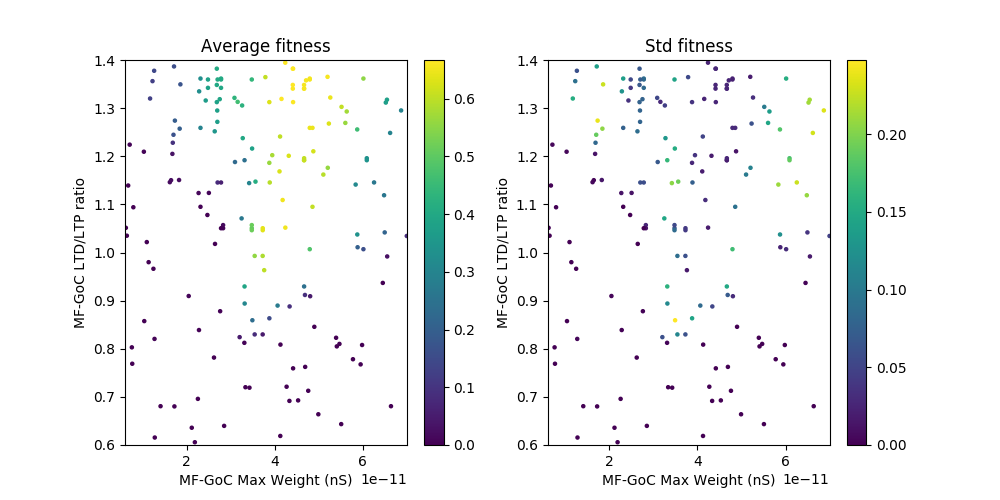

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


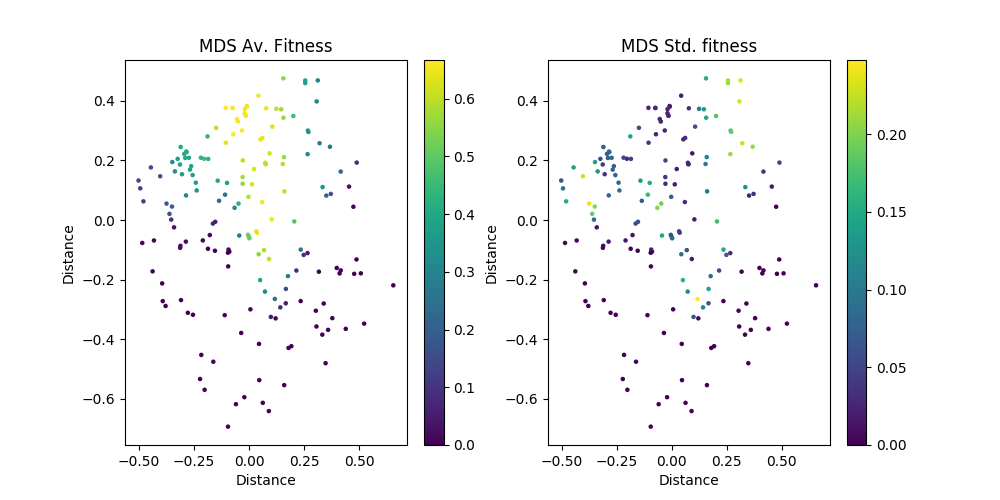

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=10000, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()